In [1]:
import os
from glob import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from torch.utils.data import Dataset, DataLoader

import numpy as np
from PIL import Image

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
seed = 1

lr = 0.001
momentum = 0.5

batch_size = 64
test_batch_size = 64

epochs = 5

no_cuda = False
log_interval = 100

### Preprocess

In [3]:
train_path = glob('../dataset/cifar/train/*.png')
test_path = glob('../dataset/cifar/test/*.png')
len(train_path), len(test_path)

(50000, 10000)

In [4]:
def get_label(path):
    lbl_name = os.path.basename(path).split('_')[-1].replace('.png','')
    label = np.argmax(classes == lbl_name)
    return label

class Dataset(Dataset):
    def __init__(self, data_paths, transform=None):
        self.data_paths = data_paths
        self.transform = transform
    
    def __len__(self):
        return len(self.data_paths)
    
    def __getitem__(self, idx):
        path = self.data_paths[idx]
        
        # Read Image
        image = Image.open(path)
        
         # Get Label
        label = get_label(path)        
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

In [5]:
data_loader = torch.utils.data.DataLoader(
    Dataset(train_path,
            transforms.Compose([
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean = [0.406],
                    std = [0.225]
                )
            ])),
    batch_size=batch_size,
    shuffle=True,
)

#### Understand Better

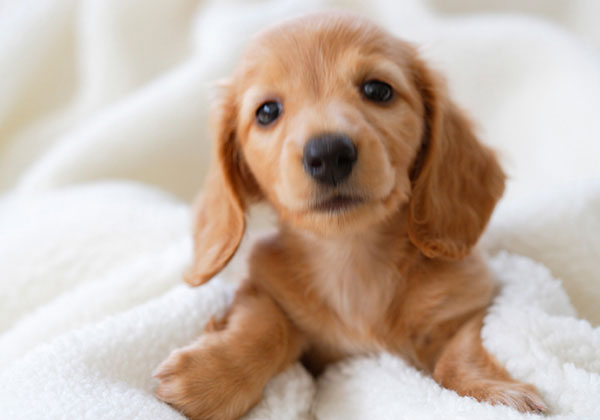

In [6]:
path = '../dataset/puppy.jpg'
image = Image.open(path)
image

In [7]:
import torchvision

In [8]:
np.array(image).shape

(420, 600, 3)

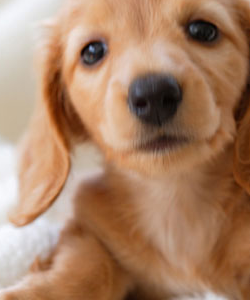

In [9]:
# 가운데 기준으로 얼만큼 crop 할건지
torchvision.transforms.CenterCrop(size=(300,250))(image)

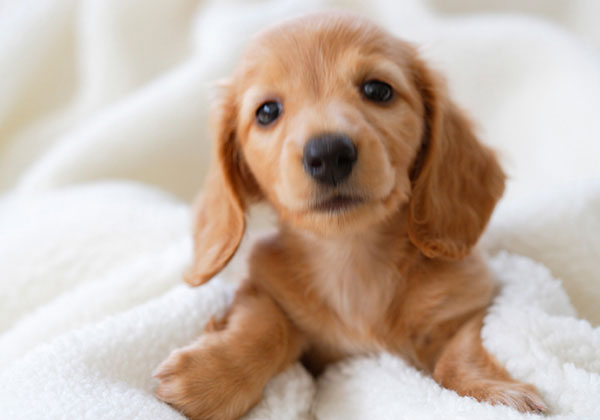

In [10]:
torchvision.transforms.ColorJitter(brightness=0, # 랜덤하게 밝기 조절
                                   contrast=0,
                                   saturation=0,
                                   hue=0)(image)

In [11]:
# 5개의 image로 crop
torchvision.transforms.FiveCrop(size=(300,300))(image)

(<PIL.Image.Image image mode=RGB size=300x300 at 0x1EB6AF8F6A0>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x1EB65FF0580>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x1EB6AF37E50>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x1EB65FF0550>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x1EB6AF14FA0>)

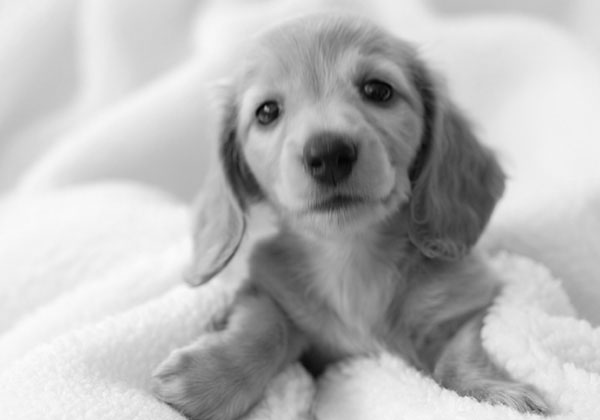

In [12]:
torchvision.transforms.Grayscale(num_output_channels=1)(image)

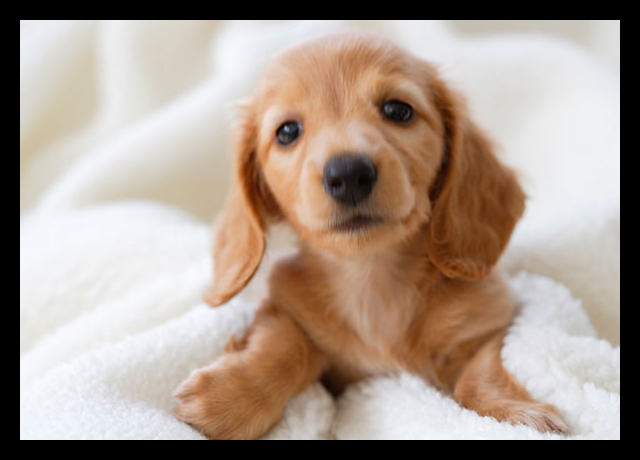

In [13]:
# image padding
torchvision.transforms.Pad(padding=(20,20),
                           fill=0,
                           padding_mode='constant')(image)

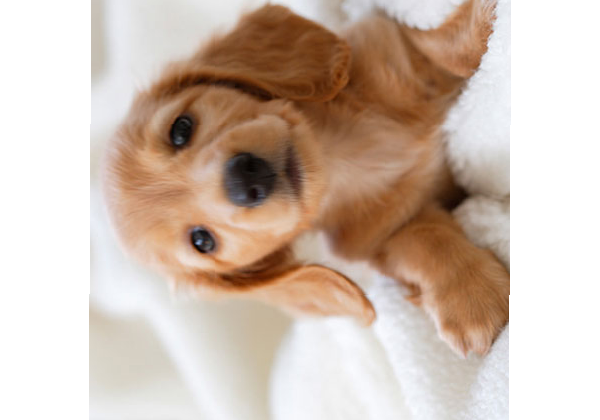

In [14]:
# image 회전
torchvision.transforms.RandomAffine(degrees=90,
                                    fillcolor=(255,255,255))(image)

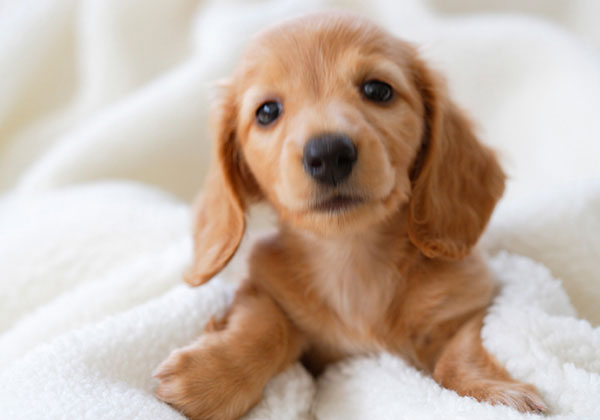

In [15]:
transforms = [torchvision.transforms.Grayscale(num_output_channels=1),
              torchvision.transforms.CenterCrop(size=(300,250)),
              torchvision.transforms.RandomAffine(degrees=90,fillcolor=0)]
# 해당 transforms를 50% 확률로 적용
torchvision.transforms.RandomApply(transforms, p=0.5)(image)

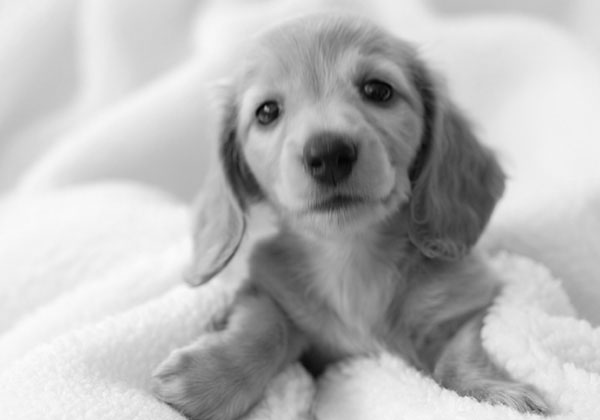

In [16]:
# Random하게 transforms의 item을 적용
torchvision.transforms.RandomChoice(transforms)(image)

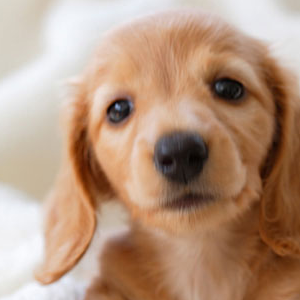

In [17]:
torchvision.transforms.RandomCrop(size=(300,300))(image)

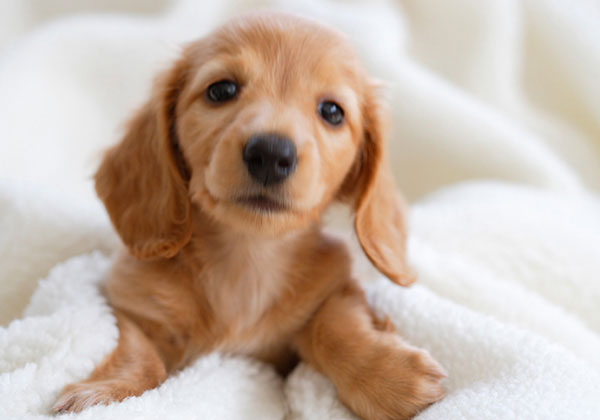

In [18]:
torchvision.transforms.RandomHorizontalFlip(p=0.8)(image)

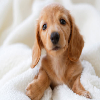

In [19]:
torchvision.transforms.Resize((100,100),
                              interpolation=0)(image)

### Transform on Tensor

In [23]:
tensor = torchvision.transforms.ToTensor()(image)
trans = torchvision.transforms.Normalize(mean=(0,0,0),
                                         std=(1,1,1))(tensor)

change_img = trans.numpy().transpose(1,2,0)

# plt.imshow()
# plt.show()

np.min(image), np.max(image), np.min(change_img), np.max(change_img), 

(0, 255, 0.0, 1.0)

In [27]:
# 일부분 지우기
trans = torchvision.transforms.RandomErasing(p=0.5,
                                             scale=(0.02, 0.33),
                                             ratio=(0.3, 3.3),
                                             value=0)(tensor)

# plt.imshow(trans.numpy().transpose(1,2,0))
# plt.show()